# Presentation : Conformal prediction implementation in River

- BOGGIO Richard
- MDIHI Samy
- VERON Marc

## Modules imports

Important to note that our custom modules have to be imported manually

In [1]:
# Existing in River
from river import datasets, metrics, stream
from river import tree, utils
from river import optim
from river import stats 
from river import preprocessing

# Not existing in River
import conf.ACP
import conf.CP
import conf.gaussian
import time_series
import time_series.evaluates
from time_series.holt_winters import HoltWinters
from time_series.AdHoeffTree_horizon import AdaptHoeffdingHorizon
from time_series.evaluates import _iter_with_horizon

# Other 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import timeit
import time
from scipy.stats import norm

Equivalent of norm.ppf in River : 

In [2]:
# Get a normal distribution
normal_dist = optim.initializers.Normal(mu=0, sigma=1, seed=42)
big_dist = normal_dist(shape=500000)

# confidence level
alpha = 0.975
# Compute with river
rolling_quantile = stats.Quantile(alpha)
for x in big_dist:
    _ = rolling_quantile.update(x)

# Check equivalence
print(f"with Scipy : {norm.ppf(alpha):.3f}")
print(f"with River : {rolling_quantile.get():.3f}")

with Scipy : 1.960
with River : 1.960


## Airline passengers dataset

In [3]:
dataset = datasets.AirlinePassengers()

## Defining the forecasting model

In [4]:
model = HoltWinters(
        alpha=0.3,
        beta=0.1,
        gamma=0.6,
        seasonality=12,
        multiplicative=True
        )

In [23]:
calib_period = 100
metric = metrics.MAE()
interval = conf.gaussian.Gaussian(window_size=calib_period, alpha=0.10)

In [24]:
time_series.evaluate(
        dataset,
        model,
        metric,
        interval,
        horizon=12,
        residual_calibration_period = calib_period
        )


(+1  MAE: 39.447084
 +2  MAE: 39.133793
 +3  MAE: 39.937303
 +4  MAE: 41.04672
 +5  MAE: 42.254928
 +6  MAE: 43.260735
 +7  MAE: 45.369326
 +8  MAE: 44.528715
 +9  MAE: 47.451617
 +10 MAE: 47.777559
 +11 MAE: 48.526037
 +12 MAE: 47.865562,
 +1  (400.7119890329967, 376.5272444202709)
 +2  (423.21005312061084, 393.71287688415475)
 +3  (401.54252883042443, 367.3290860176593)
 +4  (465.85996103340483, 432.95078592574055)
 +5  (449.4711872552776, 421.59016523109955)
 +6  (469.94867715007615, 446.09246726181664)
 +7  (537.5080558741386, 515.9359863494753)
 +8  (621.8504044849308, 598.4365964096874)
 +9  (634.3034375399776, 610.5935625240473)
 +10 (524.8639703501095, 502.1823408698712)
 +11 (464.45252442805605, 438.34480222292103)
 +12 (409.93590703259565, 384.16848869358716))

In [25]:
dir(conf)

['ACP',
 'AdaptativeConformalPrediction',
 'CP',
 'ConformalPrediction',
 'Gaussian',
 'Interval',
 'RegressionJackknife',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'gaussian',
 'jackknife']

In [26]:
dir(time_series)

['AdHoeffTree_horizon',
 'AdaptHoeffdingHorizon',
 'ForecastingInterval',
 'ForecastingMetric',
 'HoltWinters',
 'HorizonAggMetric',
 'HorizonInterval',
 'HorizonMetric',
 'SNARIMAX',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_iter_with_horizon',
 'base',
 'evaluate',
 'evaluates',
 'get_iter_evaluate',
 'holt_winters',
 'intervals',
 'iter_evaluate',
 'metrics',
 'snarimax']

In [27]:
list_x, list_y, list_y_pred, list_metrics, list_interval = time_series.get_iter_evaluate(
        dataset,
        model,
        metric,
        interval,
        horizon=12,
        residual_calibration_period = calib_period
        )

In [28]:
list_interval

[+1  (400.71198929682083, 376.5272446257306)
 +2  (423.2100532866174, 393.7128769177575)
 +3  (401.54252883112053, 367.3290858043496)
 +4  (465.85996078116784, 432.95078544179887)
 +5  (449.4711867803122, 421.59016456982124)
 +6  (469.948676465649, 446.0924664556891)
 +7  (537.5080549735351, 515.9359853810486)
 +8  (621.8504034757195, 598.4365953316501)
 +9  (634.3034366299574, 610.5935615693421)
 +10 (524.8639697681577, 502.18234026529683)
 +11 (464.4525240798568, 438.3448018393395)
 +12 (409.9359068421154, 384.16848845991956),
 +1  (400.71198929682083, 376.5272446257306)
 +2  (423.2100532866174, 393.7128769177575)
 +3  (401.54252883112053, 367.3290858043496)
 +4  (465.85996078116784, 432.95078544179887)
 +5  (449.4711867803122, 421.59016456982124)
 +6  (469.948676465649, 446.0924664556891)
 +7  (537.5080549735351, 515.9359853810486)
 +8  (621.8504034757195, 598.4365953316501)
 +9  (634.3034366299574, 610.5935615693421)
 +10 (524.8639697681577, 502.18234026529683)
 +11 (464.4525240798

## Electricity prices dataset

In [29]:
elec_prices = pd.read_csv("Prices_2016_2019_extract.csv", index_col=0, parse_dates=True)

In [30]:
elec_prices.tail(5)

Spot  hour  dow_0  dow_1  dow_2  dow_3  dow_4  dow_5  \
Date                                                                         
2019-12-31 19:00:00  46.00  19.0    0.0    1.0    0.0    0.0    0.0    0.0   
2019-12-31 20:00:00  42.20  20.0    0.0    1.0    0.0    0.0    0.0    0.0   
2019-12-31 21:00:00  39.74  21.0    0.0    1.0    0.0    0.0    0.0    0.0   
2019-12-31 22:00:00  38.88  22.0    0.0    1.0    0.0    0.0    0.0    0.0   
2019-12-31 23:00:00  37.37  23.0    0.0    1.0    0.0    0.0    0.0    0.0   

                     dow_6  lag_24_0  ...  lag_168_15  lag_168_16  lag_168_17  \
Date                                  ...                                       
2019-12-31 19:00:00    0.0     26.06  ...       26.97       27.72       33.41   
2019-12-31 20:00:00    0.0     26.06  ...       26.97       27.72       33.41   
2019-12-31 21:00:00    0.0     26.06  ...       26.97       27.72       33.41   
2019-12-31 22:00:00    0.0     26.06  ...       26.97       27.72       33.41   
2019-12-31 23:00:00    0.0     26.06  ...       26.97       27.72       33.41   

                     lag_168_18  lag_168_19  lag_168_20  lag_168_21  \
Date                                                                  
2019-12-31 19:00:00       36.51       34.03        30.0       28.93   
2019-12-31 20:00:00       36.51       34.03        30.0       28.93   
2019-12-31 21:00:00       36.51       34.03        30.0       28.93   
2019-12-31 22:00:00       36.51       34.03        30.0       28.93   
2019-12-31 23:00:00       36.51       34.03        30.0       28.93   

                     lag_168_22  lag_168_23    conso  
Date                                                  
2019-12-31 19:00:00       23.61       20.99  69600.0  
2019-12-31 20:00:00       23.61       20.99  66000.0  
2019-12-31 21:00:00       23.61       20.99  63600.0  
2019-12-31 22:00:00       23.61       20.99  64800.0  
2019-12-31 23:00:00       23.61       20.99  67500.0  

[5 rows x 58 columns]

In [31]:
elec_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34896 entries, 2016-01-08 00:00:00 to 2019-12-31 23:00:00
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Spot        34896 non-null  float64
 1   hour        34896 non-null  float64
 2   dow_0       34896 non-null  float64
 3   dow_1       34896 non-null  float64
 4   dow_2       34896 non-null  float64
 5   dow_3       34896 non-null  float64
 6   dow_4       34896 non-null  float64
 7   dow_5       34896 non-null  float64
 8   dow_6       34896 non-null  float64
 9   lag_24_0    34896 non-null  float64
 10  lag_24_1    34896 non-null  float64
 11  lag_24_2    34896 non-null  float64
 12  lag_24_3    34896 non-null  float64
 13  lag_24_4    34896 non-null  float64
 14  lag_24_5    34896 non-null  float64
 15  lag_24_6    34896 non-null  float64
 16  lag_24_7    34896 non-null  float64
 17  lag_24_8    34896 non-null  float64
 18  lag_24_9    34896 non-null  flo

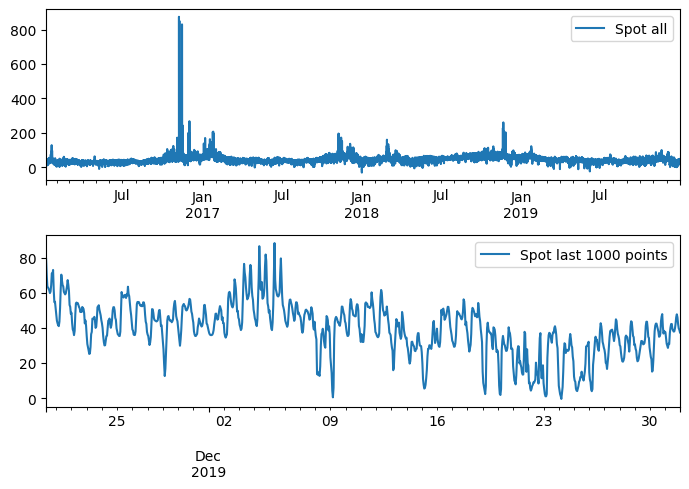

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7,5))
elec_prices[["Spot"]].plot(ax=ax1)
elec_prices[["Spot"]].iloc[-1000:,:].plot(ax=ax2)
ax1.xaxis.label.set_visible(False)
ax1.legend(["Spot all"])
ax2.xaxis.label.set_visible(False)
ax2.legend(["Spot last 1000 points"])
fig.tight_layout()

Defining the features X and the target label y

In [33]:
X, y = elec_prices.drop("Spot",axis=1), elec_prices[["Spot"]]

In [35]:
def run (model: time_series.base.Forecaster,
         stream_dataset, 
         metric=metrics.MAE(), 
         interval=conf.gaussian.Gaussian(window_size=1000, alpha=0.10),
         horizon=1,
         step=1, 
         verbose=True
        ):
    """Run the model on the dataset, and return the prediction with interval

    Parameters
    ----------
    model : tree.HoeffdingAdaptiveTreeRegressor
        the tree model
    dataset : _type_
        _description_
    cache_key : _type_
        _description_
    step : int, optional
        _description_, by default 1
    verbose : bool, optional
        _description_, by default True

    Returns
    -------
    _type_
        _description_
    """
    start = time.time()   

    # Defining the metric for the horizon
    horizon_metric = time_series.HorizonMetric(metric)
    # Defining the interval for a certain horizon
    horizon_interval = time_series.HorizonInterval(interval)
    
    # Defining the receiving list to output
    list_y = []
    list_yh = []
    list_ypred = []
    list_metric = []
    list_interval = []
    i = 0

    ##############################################################################
    # Pre-train the model
    ##############################################################################

    # Initialize the dataset from the beginning to get the grace period
    steps = _iter_with_horizon(stream_dataset, horizon)

    # Pre train the model on a defined quantities of sample "grace_periode"
    # Set the grace period as the max between horizon and the interval.window_size
    grace_period = max(horizon, interval.window_size)

    # Go over the grace_period to fit the model
    for t in range(grace_period):
        x, y, x_horizon, y_horizon = next(steps)
        model.learn_one(y=y, x=x)  # type: ignore
        if t >= interval.window_size:
            break


    ##############################################################################
    # Get first residuals series with the pre-trained model
    ##############################################################################

    # Reinitialize the dataset from the beginning to get the grace period
    # And initialize the interval window
    # TODO : being able to predict_many. Would be easier
    steps = _iter_with_horizon(stream_dataset, horizon)
    for _ in range(grace_period):
        x, y, x_horizon, y_horizon = next(steps)
        # Get the residual that will be used for calibration
        # calibration predictions (subset of training points)
        y_pred = model.forecast(horizon, xs=x_horizon)
        # Initializing the interval for each horizon
        horizon_interval.update(y_horizon, y_pred)


    ##############################################################################
    # Forecast with intervals and learn
    ##############################################################################

    # No reinitialisation of the dataset since we begin from where we stopped 
    # at the pre-train stage
    i=0
    for x, y, x_horizon, y_horizon in steps:
        # Predicting future values until a certain horizon
        y_pred = model.forecast(horizon, xs=x_horizon)
        # Updating the metric
        horizon_metric.update(y_horizon, y_pred)
        # Updating the interval for each horizon
        horizon_interval.update(y_horizon, y_pred)
        # Train the model
        model.learn_one(y=y, x=x)  # type: ignore



        # Incremente the list of metric values
        if (i+1)%step==0:
            list_metric.append(horizon_metric.get())
            list_interval.append(horizon_interval.get())
            list_y.append(y)
            list_yh.append(y_horizon)
            list_ypred.append(y_pred)

            if verbose:
                print(f"{i+1} samples : full = {list_metric[-1][0]:0.2f}")
        i += 1
    end = time.time()
    print(f"\nStream passed in {end-start:.2f} seconds")
    return list_y, list_yh, list_ypred, list_metric, list_interval

In [79]:
steps_elec = stream.iter_csv("Prices_2016_2019_extract.csv",
                             target="Spot",
                             converters={"Spot": float},
                             parse_dates={"Date": "%Y-%m-%d %H:%M:%S"})

model = (
     preprocessing.StandardScaler() |
     tree.HoeffdingAdaptiveTreeRegressor(
        grace_period=200,
        max_depth=20,
        model_selector_decay=0.3,
        seed=0
        )
)


metric = metrics.MSE()

calib_period = 1000
interval = conf.CP.ConformalPrediction(window_size=calib_period, alpha=0.10)

In [ ]:
time_series.evaluate(
        steps_elec,
        model,
        metric,
        interval,
        horizon=12,
        residual_calibration_period = calib_period
        )


In [80]:
list_y, list_yh, list_ypred, list_metric, list_interval = run(model, steps_elec, metric, interval)

1 samples : full = 7.47
2 samples : full = 7.25
3 samples : full = 12.56
4 samples : full = 13.37
5 samples : full = 11.89
6 samples : full = 13.73
7 samples : full = 13.24
8 samples : full = 11.59
9 samples : full = 11.27
10 samples : full = 14.31
11 samples : full = 15.26
12 samples : full = 14.59
13 samples : full = 15.49
14 samples : full = 15.19
15 samples : full = 14.89
16 samples : full = 14.93
17 samples : full = 14.31
18 samples : full = 13.52
19 samples : full = 12.81
20 samples : full = 12.28
21 samples : full = 15.53
22 samples : full = 25.18
23 samples : full = 29.34
24 samples : full = 28.61
25 samples : full = 27.93
26 samples : full = 27.37
27 samples : full = 26.58
28 samples : full = 25.88
29 samples : full = 25.53
30 samples : full = 25.55
31 samples : full = 25.23
32 samples : full = 24.77
33 samples : full = 24.84
34 samples : full = 24.39
35 samples : full = 24.36
36 samples : full = 23.76
37 samples : full = 23.27
38 samples : full = 23.09
39 samples : full = 22.

In [61]:
# Transform in array
arr_interval = np.asarray(list_interval)
arr_metrics = np.asarray(list_metric)
arr_ypred = np.asarray(list_ypred)
arr_yh = np.asarray(list_yh)
arr_y = np.asarray(list_y)

print(arr_interval.shape)
print(arr_metrics.shape)
print(arr_ypred.shape)
print(arr_yh.shape)
print(arr_y.shape)

(32894, 1, 2)
(32894, 1)
(32894, 1)
(32894, 1)
(32894,)


[]

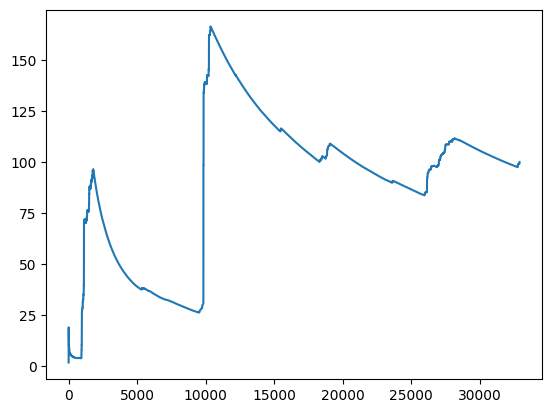

In [62]:
plt.plot(arr_metrics[:,0])
plt.plot()

In [71]:
arr_interval[:10].squeeze(1)

array([[ 7.47651815, 65.19469748],
       [15.47408495, 68.98636859],
       [35.50348619, 83.53850866],
       [       -inf,         inf],
       [       -inf,         inf],
       [       -inf,         inf],
       [       -inf,         inf],
       [       -inf,         inf],
       [       -inf,         inf],
       [       -inf,         inf]])

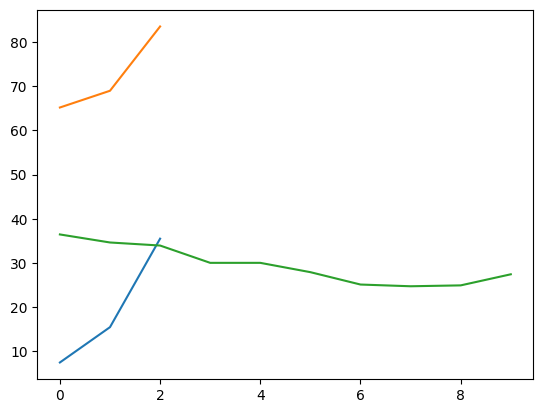

In [72]:
plt.plot(arr_interval[:10].squeeze(1))
plt.plot(arr_y[:10])
plt.show()

NameError: name 'ci' is not defined

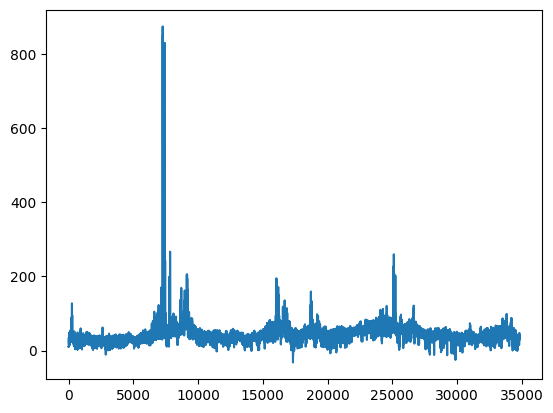

In [26]:
fig, ax = plt.subplots()
ax.plot(arr_y)
ax.fill_between((y-ci), (y+ci), color='b', alpha=.1)

In [ ]:
tab_gamma = [0,
             0.000005,
             0.00005,
             0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,
             0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,
             0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]